In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from models import Field, Config, Environment, Animal

In [10]:
import numpy as np 
import pandas as pd 

In [4]:
config = Config(food_per_year=2, eaten_food=1, size=20, init_animals=20, reproduction_rate=.9)

In [29]:
env = Environment(config=config)
env.set_food(food=90, from_x=0, to_x=3, from_y=0, to_y=2)
env.set_danger(danger=80, from_x=config.size - 5, to_x=config.size, from_y=config.size - 5, to_y=config.size)

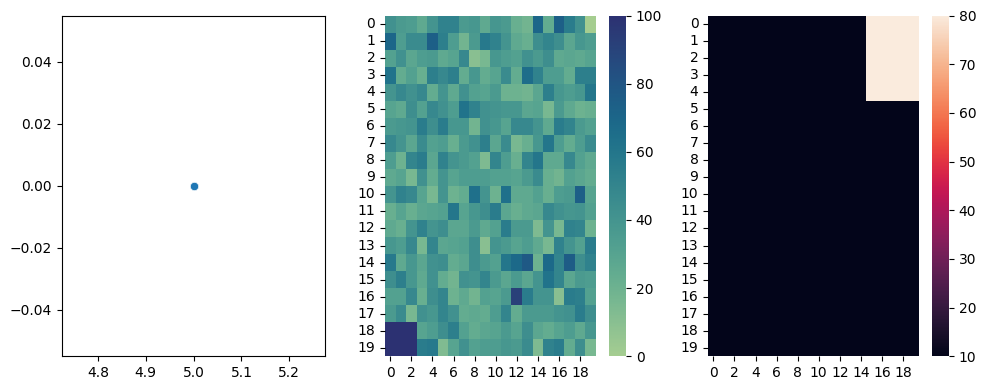

In [31]:
for i in range(100):
    positions_x = [a.position[0] for a in env.animals]
    positions_y = [a.position[1] for a in env.animals]
    fig, ax = plt.subplots(figsize=(10, 4), ncols=3)
    sns.scatterplot(x=positions_x, y=positions_y, ax=ax[0])
    sns.heatmap(env.food_to_numpy, ax=ax[1], cmap='crest')
    sns.heatmap(env.danger_to_numpy, ax=ax[2])
    plt.tight_layout()
    plt.show()
    clear_output(wait=True)

    env.iteration(i=i)
    if len(env.animals) > 10_000:
        break 

In [13]:
S = pd.DataFrame(env.stats)

In [14]:
S

,iteration,x,y,energy,age,death,children
0,0,14,9,49.0,2,NaN,0
1,0,15,0,49.0,2,NaN,1
2,0,2,1,49.0,2,NaN,0
3,0,5,17,49.0,2,NaN,0
4,0,15,2,49.0,2,NaN,0
...,...,...,...,...,...,...,...
56613,42,3,15,49.0,2,NaN,2
56614,42,3,15,49.0,2,NaN,2
56615,42,3,15,48.0,3,1.0,3
56616,42,3,15,49.0,2,NaN,1


In [23]:
from IPython.display import clear_output

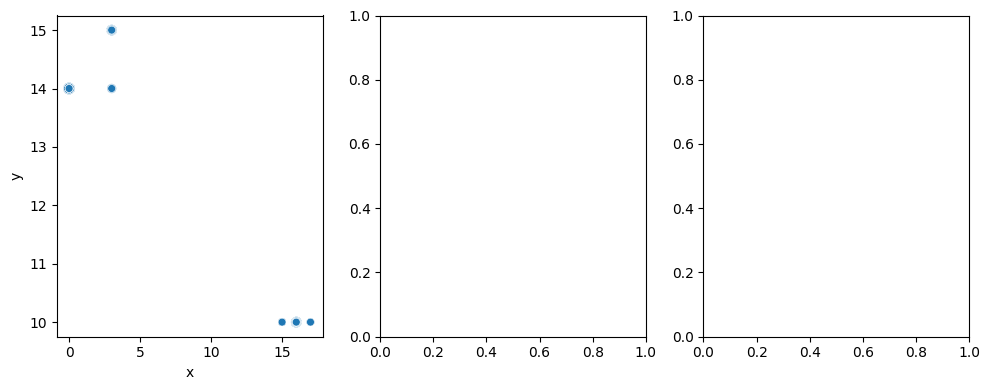

In [26]:
for i in range(42):
    data = S[S.iteration == i]
    fig, ax = plt.subplots(figsize=(10, 4), ncols=3)
    sns.scatterplot(data=data, x='x', y='y', size='age', ax=ax[0], legend=False)
    plt.tight_layout()
    plt.show()
    clear_output(wait=True)
